In [2]:
import requests
from bs4 import BeautifulSoup

response = requests.get('https://www.weather.go.kr/weather/observation/currentweather.jsp')
soup=BeautifulSoup(response.content, 'html.parser')
table=soup.find('table', {'class', 'table_develop3'})
data = []
for tr in table.find_all('tr'):
    tds = list(tr.find_all('td'))
    for td in tds :
        if td.find('a'):
            point=td.find('a').text
            temperature =tds[5].text
            humidity=tds[9].text
            data.append([point, temperature, humidity])
print(data)

[['강릉', '23.8', '64'], ['강진군', '22.1', '81'], ['강화', '23.8', '66'], ['거제', '21.8', '78'], ['거창', '22.2', '78'], ['경주시', '22.7', '73'], ['고산', '19.5', '98'], ['고창', '20.8', '89'], ['고창군', '20.2', '90'], ['고흥', '22.4', '76'], ['광양시', '22.2', '74'], ['광주', '22.0', '88'], ['구미', '24.3', '76'], ['군산', '22.5', '77'], ['금산', '21.7', '79'], ['김해시', '22.6', '78'], ['남원', '22.3', '79'], ['남해', '22.4', '76'], ['대관령', '20.5', '65'], ['대구', '23.3', '64'], ['대전', '24.3', '74'], ['동두천', '27.6', '55'], ['동해', '19.7', '78'], ['목포', '20.8', '88'], ['문경', '25.5', '58'], ['밀양', '22.6', '70'], ['백령도', '22.0', '87'], ['보령', '23.9', '62'], ['보성군', '23.2', '72'], ['보은', '24.7', '64'], ['봉화', '22.2', '70'], ['부산', '20.9', '78'], ['부안', '22.2', '80'], ['부여', '24.3', '69'], ['북강릉', '20.6', '76'], ['북창원', '22.9', '77'], ['북춘천', '29.0', '41'], ['산청', '22.6', '77'], ['상주', '24.7', '66'], ['서귀포', '22.4', '94'], ['서산', '25.4', '59'], ['서울', '27.2', '57'], ['성산', '20.7', '91'], ['세종', '24.5', '64'], ['속초', '22.9', '75

In [ ]:
with open('weather.csv', 'w') as file:
    file.write('point, temperature, humidity\n')
    for i in data:
        file.write('{0}, {1}, {2}\n'.format(i[0], i[1], i[2]))


In [7]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv('weather.csv', index_col='point', encoding='euc-kr')
city_df = df.loc[['서울', '인천', '대전', '대구', '광주', '부산', '울산']]
city_df


,temperature,humidity
point,,
서울,27.2,57
인천,24.4,65
대전,24.3,74
대구,23.3,64
광주,22.0,88
부산,20.9,78
울산,20.4,87


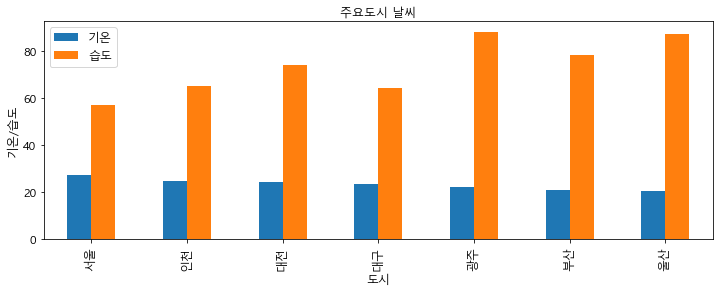

In [10]:
font_name=mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)
ax = city_df.plot(kind='bar', title='주요도시 날씨', figsize=(12,4), legend=True, fontsize=12)
ax.set_xlabel('도시', fontsize=12)
ax.set_ylabel('기온/습도', fontsize=12)
ax.legend(['기온', '습도'], fontsize=12)